In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
import sklearn
import datetime

In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [3]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from math import sqrt
from scipy import stats

In [4]:
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basment', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/Cleaned_Dataset.csv', dtype = kc_dtypes, parse_dates = ['date'])

kc_data['sqft_basement'] = kc_data['sqft_basement'].astype(dtype=float, errors='ignore')
#setting waterfront NaN values equal to the ratio of waterfront/non-waterfront properties, will want to try and narrow by zipcode 
#filling NaN with easily seperatable/changable values helpful 
kc_data['waterfront'] = kc_data['waterfront'].fillna(146/19221)
kc_data['view'] = kc_data['view'].fillna((957 + (508*2) + (330*3) + (317*4))/21534)

In [5]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20717 entries, 0 to 20716
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20717 non-null  int32         
 1   date           20717 non-null  datetime64[ns]
 2   price          20717 non-null  float64       
 3   bedrooms       20717 non-null  int32         
 4   bathrooms      20717 non-null  float64       
 5   sqft_living    20717 non-null  int32         
 6   sqft_lot       20717 non-null  int32         
 7   floors         20717 non-null  float64       
 8   waterfront     20717 non-null  float64       
 9   view           20717 non-null  float64       
 10  condition      20717 non-null  float64       
 11  grade          20717 non-null  int32         
 12  sqft_above     20717 non-null  int32         
 13  sqft_basement  20717 non-null  float64       
 14  yr_built       20717 non-null  int32         
 15  yr_renovated   2071

In [6]:
# model cannot handle dates? 
# cannot find a singe question mark by searching but getting errors so swapping for 0
# honestly 0 fills all pretty well, it's the mode of most of them and means 'none' for things like basements, which aren't 
# common here 
kc_data = kc_data.drop('date', axis=1).copy() 

In [7]:
# seperate your x and y, here I am looking at price 
kcy = kc_data['price'].to_frame()
kcx = kc_data.drop('price', axis=1)

In [8]:
# initialize regression
reg = linear_model.LinearRegression()

In [9]:
# split data into 80/20 training/testing
x_train, x_test, y_train, y_test = train_test_split(kcx, kcy, test_size=0.2, random_state=42)

In [10]:
# train the model 
reg.fit(x_train, y_train)

LinearRegression()

In [11]:
# print coefficients for each feat/column 
print(reg.coef_)

[[-1.05324816e-06 -1.21632248e+04  2.75231435e+04  6.90418155e+01
   2.34159176e-01  3.52861217e+04  1.79155872e+05  3.98640929e+04
   2.70251543e+04  8.19985350e+04  1.33927241e+01  1.79758838e+01
  -2.02579108e+03  1.75437258e+01 -2.89873227e+02  5.61572270e+05
  -8.54479724e+04  4.82150569e+01 -1.65315570e-01]]


In [12]:
# print test data predictions 
y_pred = reg.predict(x_test)
y_pred

array([[111704.01693933],
       [646553.6071042 ],
       [494917.70674748],
       ...,
       [464636.24702926],
       [732594.93148061],
       [429278.09964622]])

In [13]:
#print vaalues
y_test

,price
16626,189950.0
20112,525000.0
12965,400000.0
10968,273000.0
3429,221000.0
...,...
16296,401000.0
1213,302495.0
11727,530000.0
14714,649500.0


In [14]:
# check accuracy with mean sq 
print(np.mean((y_pred - y_test)**2))

price    1.705410e+10
dtype: float64


In [15]:
# check accuracy with mean sq 
print(mean_squared_error(y_test, y_pred))
# very innaccurate? 

17054097914.023804


In [16]:
def calc_slope(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)**2) - np.mean(xs*xs)))
    
    return m

calc_slope(y_test, y_pred)

price    0.693569
dtype: float64

In [17]:
#reassign variables to help with computer speed 
kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/Cleaned_Dataset.csv', dtype = kc_dtypes, parse_dates = ['date'])

kcy = kc_data['price'].to_frame()
kcx = kc_data.drop('price', axis=1)
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20717 entries, 0 to 20716
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20717 non-null  int32         
 1   date           20717 non-null  datetime64[ns]
 2   price          20717 non-null  float64       
 3   bedrooms       20717 non-null  int32         
 4   bathrooms      20717 non-null  float64       
 5   sqft_living    20717 non-null  int32         
 6   sqft_lot       20717 non-null  int32         
 7   floors         20717 non-null  float64       
 8   waterfront     20717 non-null  float64       
 9   view           20717 non-null  float64       
 10  condition      20717 non-null  float64       
 11  grade          20717 non-null  int32         
 12  sqft_above     20717 non-null  int32         
 13  sqft_basement  20717 non-null  float64       
 14  yr_built       20717 non-null  int32         
 15  yr_renovated   2071

In [18]:
#Trying KNN
# maybe try 60% train , 20% adj, 20% test?
cv = KFold(n_splits=10)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
k_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=5)

TypeError: invalid type promotion

In [19]:
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, k_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, k_pred), 2)))
print('Slope: ' + str(calc_slope(kcy, k_pred)))

NameError: name 'k_pred' is not defined

In [20]:
kc_data.var()

id               1.427370e+18
price            5.465874e+10
bedrooms         7.799551e-01
bathrooms        5.060915e-01
sqft_living      5.866685e+05
sqft_lot         1.526440e+09
floors           2.892136e-01
waterfront       3.415475e-03
view             4.482115e-01
condition        4.201026e-01
grade            1.116025e+00
sqft_above       5.221938e+05
sqft_basement    1.560450e+05
yr_built         8.600489e+02
yr_renovated     1.239180e+05
zipcode          2.852952e+03
lat              1.962506e-02
long             2.004544e-02
sqft_living15    3.883395e+05
sqft_lot15       6.396686e+08
dtype: float64

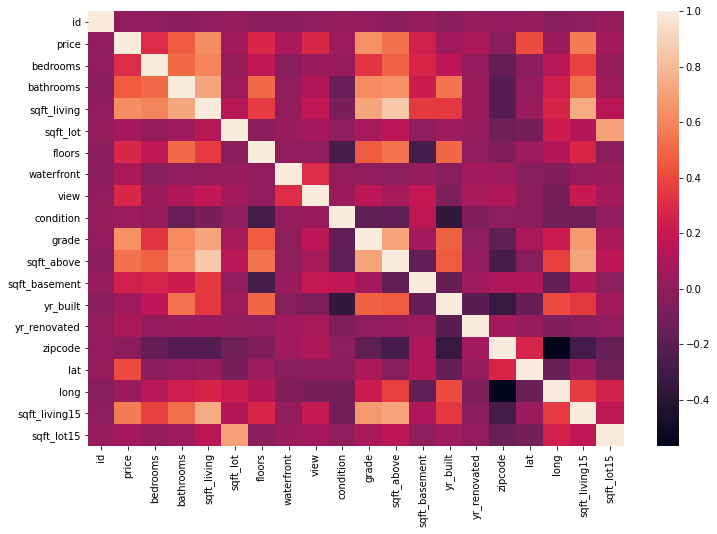

In [21]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()

In [60]:
#reassign to save space?
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basment', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/Cleaned_Dataset.csv', dtype = kc_dtypes, parse_dates = ['date'])

# new drop, hoping sqft_basement is what's giving me an error, which would make sense bc i cant assign it a dtype 
kc_data = kc_data.drop('date', axis=1).copy() 
kc_data = kc_data.drop('sqft_basement', axis=1).copy() 
kc_data = kc_data.fillna('0').copy()


kcy = kc_data['price'].to_frame()
kcx = kc_data.drop('price', axis=1)


In [27]:
#kc_data.loc[kc_data['price'] == 0.0]
kc_data['price'].sort_values()

14673      78000.0
447        80000.0
15542      81000.0
7918       82000.0
2046       82500.0
           ...    
18133    1410000.0
8468     1410000.0
18230    1410000.0
18810    1410000.0
4421     1410000.0
Name: price, Length: 20717, dtype: float64

In [28]:
abs(kc_data.corr()['price'])

id               0.006363
price            1.000000
bedrooms         0.301928
bathrooms        0.462005
sqft_living      0.632103
sqft_lot         0.074051
floors           0.279703
waterfront       0.088417
view             0.284198
condition        0.039709
grade            0.643721
sqft_above       0.534175
yr_built         0.045862
yr_renovated     0.098764
zipcode          0.013027
lat              0.409811
long             0.038681
sqft_living15    0.566853
sqft_lot15       0.064767
Name: price, dtype: float64

In [29]:
abs(kc_data.corr())['price'][abs(kc_data.corr()['price'])>0.7].drop('price').index.tolist()

[]

In [30]:
# rank features by correlation 
# 0.7 returning empty array, .65 best correlation we're getting 

vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.65]

for val in vals:
    features = abs(kc_data.corr())['price'][abs(kc_data.corr()['price'])>val].drop('price').index.tolist()
    
    x = kc_data.drop(columns='price')
    x = x[features]
    
    y_pred = cross_val_predict(classifier_pipeline, x, kcy, cv=cv)
    
    print(features)
    print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
    print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  115666.43
R Squared: 0.76
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  115666.43
R Squared: 0.76
['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  119275.88
R Squared: 0.74
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  118098.13
R Squared: 0.74
['sqft_living', 'grade', 'sqft_above', 'sqft_living15']
RMSE:  167253.56
R Squared: 0.49
['sqft_living', 'grade']
RMSE:  175965.51
R Squared: 0.43


ValueError: at least one array or dtype is required

In [31]:
# feature selection using wrapper 
kc_data['sqft_living'] = kc_data['sqft_living'].astype('category')
dummies = pd.get_dummies(kc_data['sqft_living'])
kc_dum = kc_data.drop(columns='sqft_living').merge(dummies, left_index=True, right_index=True )

In [32]:
sfs1 = SFS(classifier_pipeline,
          k_features = 16,
          forward = True,
          scoring = 'neg_mean_squared_error',
          cv=cv)

In [33]:
sfs1.fit(kcx, kcy)

SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                          estimator=Pipeline(steps=[('standardscaler',
                                                     StandardScaler()),
                                                    ('kneighborsregressor',
                                                     KNeighborsRegressor(n_neighbors=10))]),
                          k_features=16, scoring='neg_mean_squared_error')

In [34]:
sfs1.subsets_

{1: {'feature_idx': (13,),
  'cv_scores': array([-2.91037103e+10, -3.13936132e+10, -3.08127302e+10, -2.91107755e+10,
         -3.17468234e+10, -3.36903325e+10, -2.97898359e+10, -3.30229377e+10,
         -3.28667841e+10, -4.00997279e+10]),
  'avg_score': -32163727086.031075,
  'feature_names': ('zipcode',)},
 2: {'feature_idx': (9, 13),
  'cv_scores': array([-1.54473032e+10, -1.69140805e+10, -1.55522689e+10, -1.51753010e+10,
         -1.55278417e+10, -1.54645223e+10, -1.48737719e+10, -1.56379082e+10,
         -1.76991874e+10, -2.37634388e+10]),
  'avg_score': -16605562375.717371,
  'feature_names': ('grade', 'zipcode')},
 3: {'feature_idx': (9, 13, 14),
  'cv_scores': array([-1.35426655e+10, -1.53886599e+10, -1.37344810e+10, -1.33975679e+10,
         -1.38127537e+10, -1.41730117e+10, -1.35050536e+10, -1.37892879e+10,
         -1.46087653e+10, -2.20537510e+10]),
  'avg_score': -14800599760.437237,
  'feature_names': ('grade', 'zipcode', 'lat')},
 4: {'feature_idx': (3, 9, 13, 14),
  'cv_

In [69]:
kc_data = pd.read_csv('dsc-phase-2-project/data/Normalized_Dataset.csv', dtype = kc_dtypes, parse_dates = ['date'])
kcy = kc_data['price_zscore'].to_frame()
kcx = kc_data.drop('price_zscore', axis=1)
y_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=cv)
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

TypeError: invalid type promotion

In [68]:
kc_data.corr()

,id,waterfront,view,yr_renovated,zipcode,lat,long,price_zscore,bedrooms_zscore,bathrooms_zscore,sqft_living_zscore,sqft_lot_zscore,floors_zscore,condition_zscore,grade_zscore,sqft_above_zscore,sqft_basement_zscore,yr_built_zscore
id,1.000000,-0.005003,-0.000933,-0.004996,0.008591,0.016554,-0.032385,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
waterfront,-0.005003,1.000000,0.381139,0.999579,0.029268,-0.012061,-0.037608,-0.007722,-0.005004,-0.005715,-0.005735,-0.003206,-0.004983,-0.005003,-0.008021,-0.005265,-0.008209,-0.005003
view,-0.000933,0.381139,1.000000,0.380677,0.085130,0.006161,-0.077774,-0.002357,-0.000539,-0.000925,0.001277,-0.000437,-0.001040,-0.000933,0.000584,0.001541,-0.001093,-0.000933
yr_renovated,-0.004996,0.999579,0.380677,1.000000,0.028923,-0.012157,-0.037628,-0.007717,-0.004985,-0.005706,-0.005721,-0.003211,-0.004972,-0.004996,-0.008000,-0.005274,-0.008201,-0.004996
zipcode,0.008591,0.029268,0.085130,0.028923,1.000000,0.266742,-0.564259,0.007212,0.009031,0.008529,0.008340,0.010022,0.008424,0.008591,0.008701,0.008493,0.008627,0.008591
lat,0.016554,-0.012061,0.006161,-0.012157,0.266742,1.000000,-0.135371,0.015538,0.016366,0.016425,0.017457,0.013664,0.016411,0.016554,0.017106,0.017746,0.017162,0.016554
long,-0.032385,-0.037608,-0.077774,-0.037628,-0.564259,-0.135371,1.000000,-0.031536,-0.032723,-0.032312,-0.031984,-0.037751,-0.032118,-0.032385,-0.032411,-0.031818,-0.031957,-0.032385
price_zscore,1.000000,-0.007722,-0.002357,-0.007717,0.007212,0.015538,-0.031536,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
bedrooms_zscore,1.000000,-0.005004,-0.000539,-0.004985,0.009031,0.016366,-0.032723,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
bathrooms_zscore,1.000000,-0.005715,-0.000925,-0.005706,0.008529,0.016425,-0.032312,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
# read data
kc_columns = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basment', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']

kc_dtypes = {'id': int, 'date' : str,  'price': float, 'bedrooms' : int, 'bathrooms' : float, 'sqft_living': int, 'sqft_lot': int, 'floors': float, 
             'waterfront': float, 'view' : float, 'condition': float, 'grade': int, 'sqft_above': int, 'yr_built': int,
             'yr_renovated': float, 'zipcode': float, 'lat': float, 'long': float, 'sqft_living15': int, 'sqft_lot15': int}

kc_data = pd.read_csv('dsc-phase-2-project/data/Cleaned_Dataset.csv', dtype = kc_dtypes, parse_dates = ['date'])


In [41]:
kcy = kc_data['price'].to_frame()
kcx = kc_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 
              'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
              'sqft_lot15']]

In [42]:
kcy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20561 entries, 0 to 20716
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   20561 non-null  float64
dtypes: float64(1)
memory usage: 321.3 KB


In [43]:
reg = linear_model.LinearRegression()

In [44]:
x_train, x_test, y_train, y_test = train_test_split(kcx, kcy, test_size=0.2, random_state=42)

In [45]:
reg.fit(x_train, y_train)

LinearRegression()

In [46]:
print(reg.coef_)

[[-1.35359151e+04  2.71160836e+04  8.08832362e+01  2.15133144e-01
   3.41719631e+04  9.65308338e+04  4.10179980e+04  2.58408523e+04
   8.20819590e+04  3.62724764e+00  1.30206949e+00 -2.07422623e+03
   9.65308338e+04 -2.91661744e+02  5.53225291e+05 -8.64883586e+04
   4.70608843e+01 -1.64779650e-01]]


In [47]:
# print test data predictions 
y_pred = reg.predict(x_test)
y_pred

array([[605245.34327173],
       [390795.68976767],
       [674013.04860069],
       ...,
       [442406.80685517],
       [927192.90194176],
       [318452.25679315]])

In [48]:
#print vaalues
y_test

,price
10870,825000.0
17854,283450.0
5540,739375.0
12072,309500.0
11508,445000.0
...,...
17955,645000.0
1639,453000.0
11939,385000.0
9674,1230000.0


In [49]:
# check accuracy with mean sq 
print(np.mean((y_pred - y_test)**2))

price    1.740947e+10
dtype: float64


In [50]:
# check accuracy with mean sq 
print(mean_squared_error(y_test, y_pred))
# still bad but a LOT better

17409472243.728107


In [51]:
#Trying KNN
# maybe try 60% train , 20% adj, 20% test?
cv = KFold(n_splits=10, random_state=0)
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=10))
k_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=5)

C:\Users\Fennec\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [52]:
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, k_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, k_pred), 2)))
print('Slope: ' + str(calc_slope(kcy, k_pred)))

RMSE:  108551.49
R Squared: 0.78
Slope: price    0.752601
dtype: float64


In [53]:
kc_data.var()

id               1.427591e+18
price            5.379149e+10
bedrooms         7.725152e-01
bathrooms        5.036384e-01
sqft_living      5.712756e+05
sqft_lot         1.524098e+09
floors           2.896603e-01
waterfront       3.441258e-03
view             4.360442e-01
condition        4.190045e-01
grade            1.110447e+00
sqft_above       5.229513e+05
sqft_basement    1.450386e+05
yr_built         8.637577e+02
yr_renovated     3.441258e-03
zipcode          2.845408e+03
lat              1.966432e-02
long             2.010724e-02
sqft_living15    3.849591e+05
sqft_lot15       6.379528e+08
dtype: float64

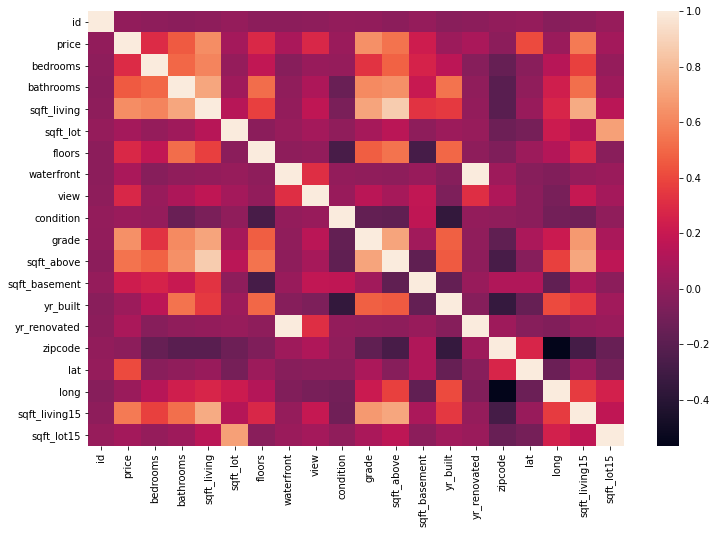

In [54]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize = fig_dims)
sns.heatmap(kc_data.corr(), ax=ax)
plt.show()

In [ ]:
abs(kc_data.corr()['price']).sort_values(ascending=False)

In [55]:
# rank features by correlation 
# 0.7 returning empty array, .6 best correlation we're getting 

vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for val in vals:
    features = abs(kc_data.corr())['price'][abs(kc_data.corr()['price'])>val].drop('price').index.tolist()
    
    x = kc_data.drop(columns='price')
    x = x[features]
    
    y_pred = cross_val_predict(classifier_pipeline, x, kcy, cv=cv)
    
    print(features)
    print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
    print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
RMSE:  116932.89
R Squared: 0.75
['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']
RMSE:  116932.89
R Squared: 0.75
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  117764.4
R Squared: 0.74
['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'lat', 'sqft_living15']
RMSE:  117764.4
R Squared: 0.74
['sqft_living', 'grade', 'sqft_above', 'sqft_living15']
RMSE:  166718.85
R Squared: 0.48
['sqft_living', 'grade']
RMSE:  174728.25
R Squared: 0.43


In [ ]:
# feature selection using wrapper 
kc_data['sqft_living'] = kc_data['sqft_living'].astype('category')
dummies = pd.get_dummies(kc_data['sqft_living'])
kc_dum = kc_data.drop(columns='sqft_living').merge(dummies, left_index=True, right_index=True )

In [ ]:
sfs1 = SFS(classifier_pipeline,
          k_features = 18,
          forward = True,
          scoring = 'neg_mean_squared_error',
          cv=cv)

In [ ]:
kcx

In [ ]:
sfs1.fit(kcx, kcy)

In [ ]:
#hide these from view, very long 
sfs1.subsets_

In [ ]:
# using our top 4 features to build our new model 
kcy = kc_data['price'].to_frame()
kcx = kc_data[['sqft_living', 'grade', 'zipcode', 'lat']].copy()
y_pred = cross_val_predict(classifier_pipeline, kcx, kcy, cv=cv)
print('RMSE:  ' + str(round(sqrt(mean_squared_error(kcy, y_pred)), 2)))
print('R Squared: ' + str(round(r2_score(kcy, y_pred), 2)))

In [ ]:
kc_data[['price', 'sqft_living', 'grade', 'zipcode', 'lat']].corr()

In [ ]:
sns.pairplot(kc_data[['price', 'sqft_living', 'grade', 'zipcode', 'lat']])

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

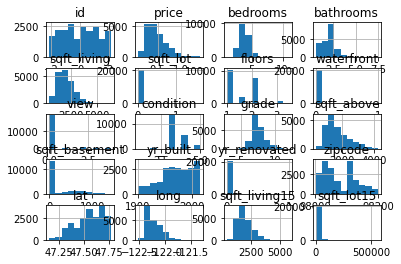

In [58]:
kc_data.hist()